In [ ]:
import pandas as pd #importing pandas to read files
import numpy as np #importing numpy for calculations
import matplotlib.pyplot as plt #importing matplotlib's pyplot for plotting and graphs
import seaborn as sb
import calendar
from datetime import datetime


df = pd.read_csv('All_ViewingActivity.csv')

df.head()


,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,User 1,2022-04-28 16:08:56,00:00:06,NaN,Chernobyl 1986,NaN,Device Type 1,01:02:16,01:02:16,IN (India)
1,User 1,2022-04-28 15:54:30,00:09:39,NaN,13 Hours: The Secret Soldiers of Benghazi,NaN,Device Type 1,02:13:19,02:13:19,IN (India)
2,User 1,2022-04-28 15:53:20,00:00:06,NaN,Saving Private Ryan,NaN,Device Type 1,01:16:17,01:16:17,IN (India)
3,User 1,2022-04-28 15:52:18,00:00:15,NaN,Mosul,NaN,Device Type 1,01:06:44,01:06:44,IN (India)
4,User 1,2022-04-28 15:49:11,00:01:45,NaN,12 Strong,NaN,Device Type 1,00:52:28,00:52:28,IN (India)


In [ ]:
df['Start Time']= pd.to_datetime(df['Start Time'])

df['Date'] = df['Start Time'].dt.date
df['Hour'] = df['Start Time'].dt.hour
df['DayOfWeek'] = df['Start Time'].dt.dayofweek
df['DayName'] = df['Start Time'].dt.day_name()
df['Month'] = df['Start Time'].dt.month_name()
df['Year'] = df['Start Time'].dt.year

df[['Title','Start Time','Hour','DayName','Month','Year']].head()


,Title,Start Time,Hour,DayName,Month,Year
0,Chernobyl 1986,2022-04-28 16:08:56,16,Thursday,April,2022
1,13 Hours: The Secret Soldiers of Benghazi,2022-04-28 15:54:30,15,Thursday,April,2022
2,Saving Private Ryan,2022-04-28 15:53:20,15,Thursday,April,2022
3,Mosul,2022-04-28 15:52:18,15,Thursday,April,2022
4,12 Strong,2022-04-28 15:49:11,15,Thursday,April,2022


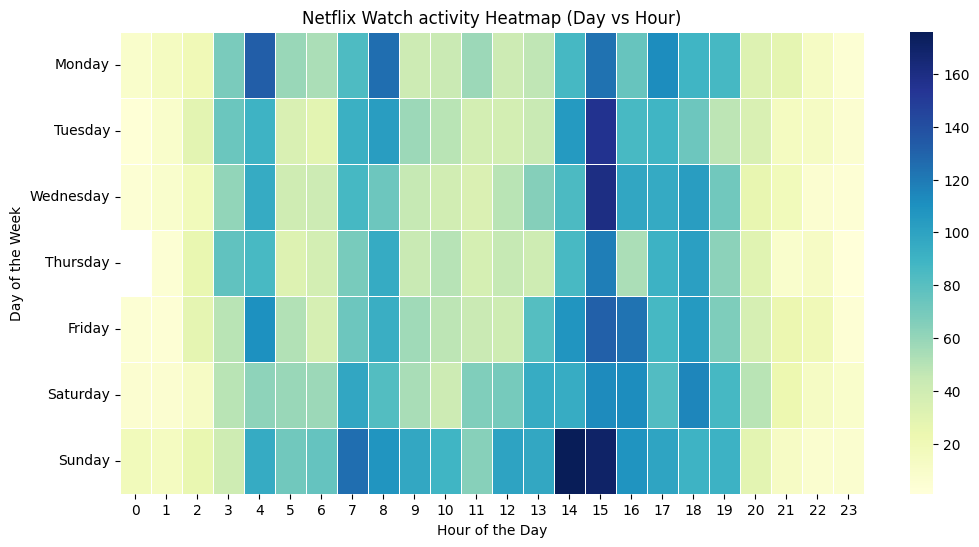

In [ ]:

heatmap_data = df.groupby(['DayName',"Hour"]).size().reset_index(name='Count')



heatmap_pivot = heatmap_data.pivot(index ='DayName', columns ='Hour',values = 'Count' )

ordered_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_pivot = heatmap_pivot.reindex(ordered_days)

plt.figure(figsize=(12,6))
sb.heatmap(heatmap_pivot,cmap="YlGnBu",linewidths=0.5)
plt.title("Netflix Watch activity Heatmap (Day vs Hour)")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


/tmp/ipython-input-19-2503044353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(y=top_titles.index,x=top_titles.values,palette='viridis')


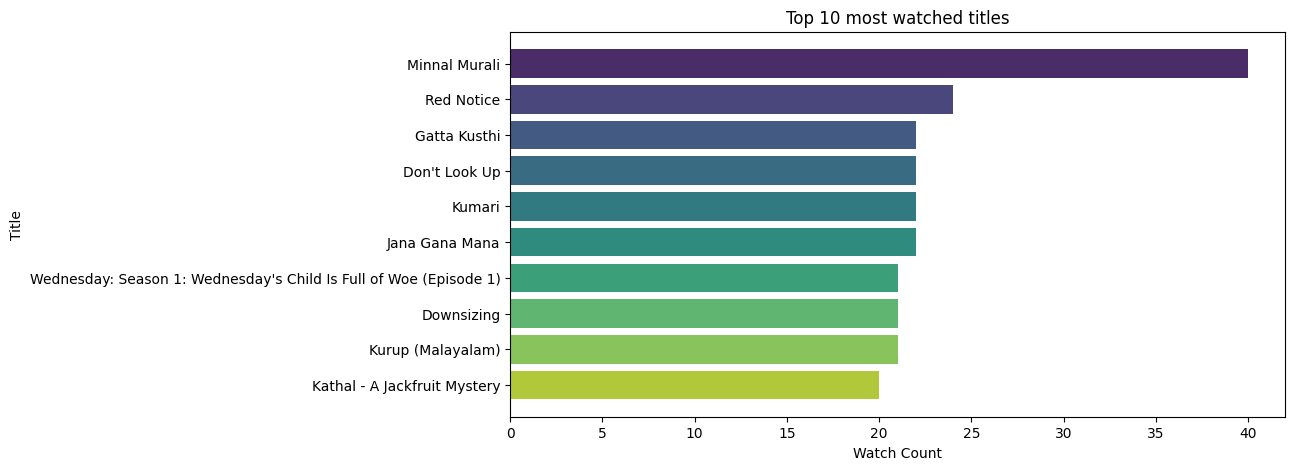

In [19]:
top_titles = df['Title'].value_counts().head(10)

plt.figure(figsize=(10,5))
sb.barplot(y=top_titles.index,x=top_titles.values,palette='viridis')
plt.plot()
plt.title('Top 10 most watched titles')
plt.xlabel('Watch Count')
plt.ylabel('Title')
plt.show()

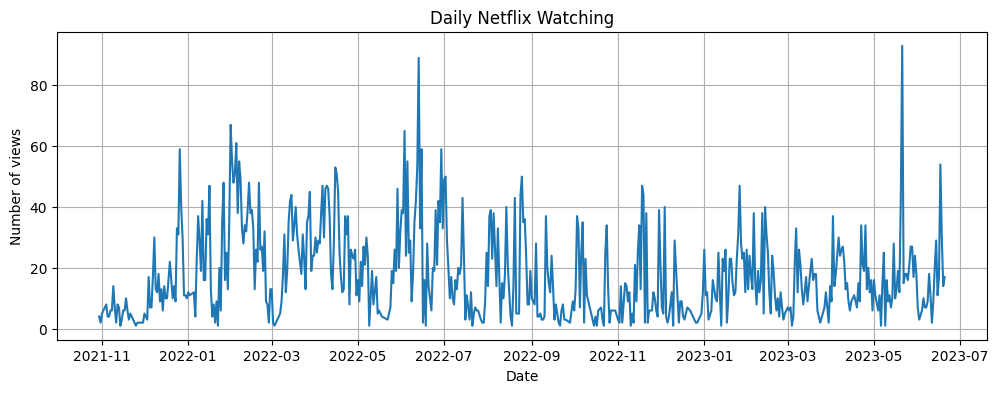

In [18]:
daily = df.groupby('Date').size()

plt.figure(figsize=(12,4))
daily.plot()
plt.title('Daily Netflix Watching')
plt.xlabel('Date')
plt.ylabel('Number of views')
plt.grid(True)
plt.show()

/tmp/ipython-input-17-273303119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Hour',data=df,palette='magma')


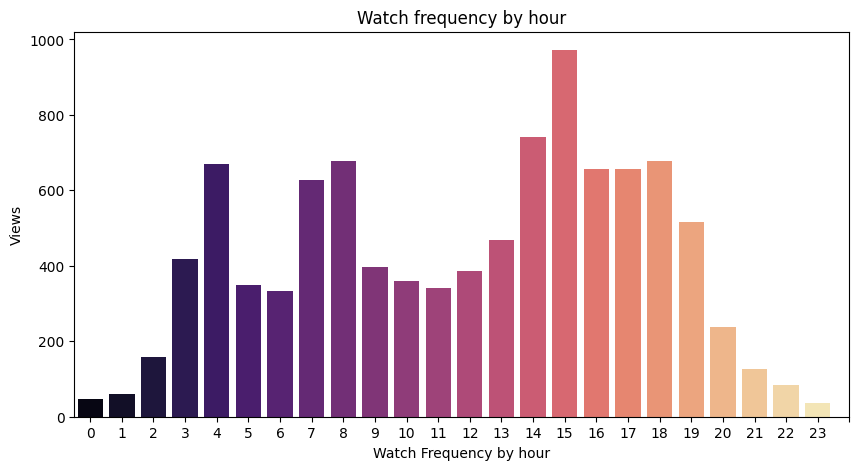

In [17]:
plt.figure(figsize=(10,5))
sb.countplot(x='Hour',data=df,palette='magma')
plt.title('Watch frequency by hour')
plt.xlabel('Watch Frequency by hour')
plt.ylabel('Views')
plt.xticks(range(0,25))
plt.show()

/tmp/ipython-input-16-3402927695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='DayName',data=df,order=order,palette='coolwarm')


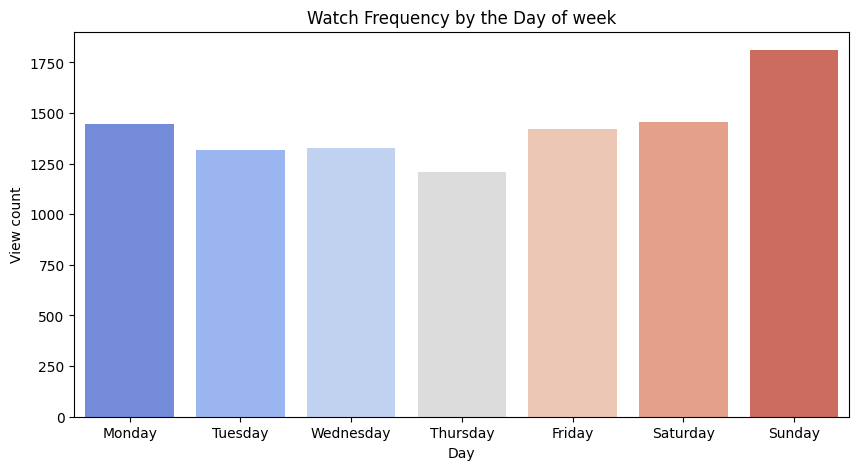

In [16]:

order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(10,5))
sb.countplot(x='DayName',data=df,order=order,palette='coolwarm')
plt.title('Watch Frequency by the Day of week')
plt.xlabel('Day')
plt.ylabel('View count')
plt.show()